### Class 8:

1) Choose a wikipedia page. For each neighbor of the page, get all of its links, keeping only those present in the list of neighbors of the ego. Add each link as a directed edge to your graph.

2) Look up the PageRank algorithm in the networkx documentation. Run it and see which nodes are most important according to this measure. Create a scatterplot where you use in-degree on one axis, and pagerank on the other axis. 

3) Plot the distributions of out-degree and in-degree for your network on the same plot, on a log-log scale.

4) Create a BA graph of 100 nodes and with $m=3$ using the built in networkx function. Set an attribute size for each node proportional to the degree of the node. Visualize the graph using for nodes the size set in the attribute. 

In [1]:
import re
import urllib.request
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import networkx as nx

I added one row to your function : urllib.request.Request.set_proxy
I was not able to get results without this line

In [2]:
#define a function to get the links from a downloaded html string
def get_links(url):
    '''pass a url and return a list of wikipedia links'''
    urllib.request.Request.set_proxy #my line
    request = urllib.request.Request(url)
    result = urllib.request.urlopen(request)
    base=result.read()
    base=str(base)
    splitting=base.split('<a href=') 
    links=[]
    for nn in splitting:
        #use a regular expression to pick out the wikipedia internal links
        link=[x for x in re.findall('"([^"]*)"',nn) if x[0:5]=='/wiki']
        if len(link)>0:
            #links containing : are general wikipedia pages that we want to skip
            if ':' in link[0]:
                pass
            else:
                links.append('https://en.wikipedia.org'+link[0])
    #take the set to remove duplicates
    return list(set(links))

## I am from this small town in Turkey, closed to Cyprus Island. Its name is Gazipasa

In [3]:
#declare your starting page
base_page = 'https://en.wikipedia.org/wiki/Gazipa%C5%9Fa'

#get the neighbors of your base page
first_neighbors = get_links(base_page)

#create a networkx DiGraph object and add the edges from the base_page to the neighbors
D=nx.DiGraph()
for page in first_neighbors:
    D.add_edge(base_page,page)

In [4]:
len(first_neighbors)

156

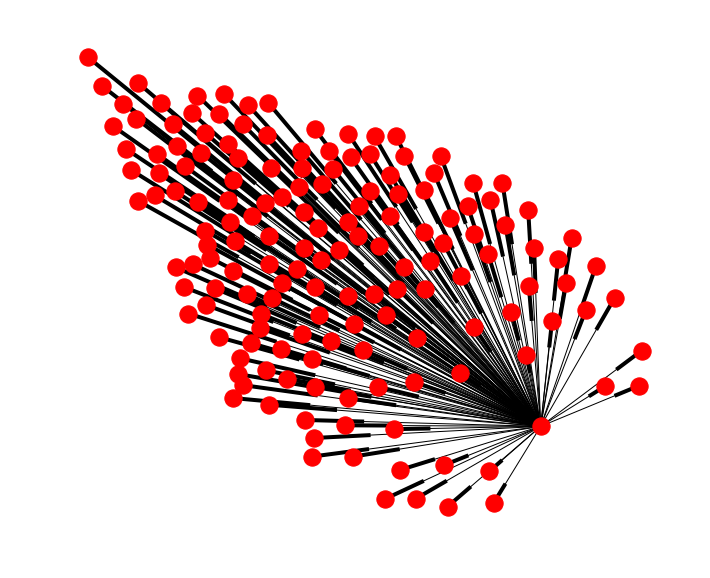

In [5]:
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(D, with_labels=False)
plt.show()

In [6]:
D2=nx.DiGraph()
for i in first_neighbors:
    second_neighbors = get_links(i)

    for j in second_neighbors:
        if j in first_neighbors:
            D2.add_edge(j,i)

In [8]:
D3 = D2.copy()
D3.remove_node('https://en.wikipedia.org/wiki/Gazipa%C5%9Fa')
D3.nodes()

['https://en.wikipedia.org/wiki/Yozgat_Province',
 'https://en.wikipedia.org/wiki/Ayd%C4%B1n_Province',
 'https://en.wikipedia.org/wiki/Sivas_Province',
 'https://en.wikipedia.org/wiki/Tokat_Province',
 'https://en.wikipedia.org/wiki/Kilis_Province',
 'https://en.wikipedia.org/wiki/U%C5%9Fak_Province',
 'https://en.wikipedia.org/wiki/Bitlis_Province',
 'https://en.wikipedia.org/wiki/Mediterranean_Region_(statistical)',
 'https://en.wikipedia.org/wiki/East_Black_Sea_Region_(statistical)',
 'https://en.wikipedia.org/wiki/Aksaray_Province',
 'https://en.wikipedia.org/wiki/Siirt_Province',
 'https://en.wikipedia.org/wiki/Erzincan_Province',
 'https://en.wikipedia.org/wiki/Amasya_Province',
 'https://en.wikipedia.org/wiki/Karaman_Province',
 'https://en.wikipedia.org/wiki/%C5%9E%C4%B1rnak_Province',
 'https://en.wikipedia.org/wiki/%C3%87anakkale_Province',
 'https://en.wikipedia.org/wiki/%C4%B0zmir_Province',
 'https://en.wikipedia.org/wiki/Mu%C4%9Fla_Province',
 'https://en.wikipedia.org/w

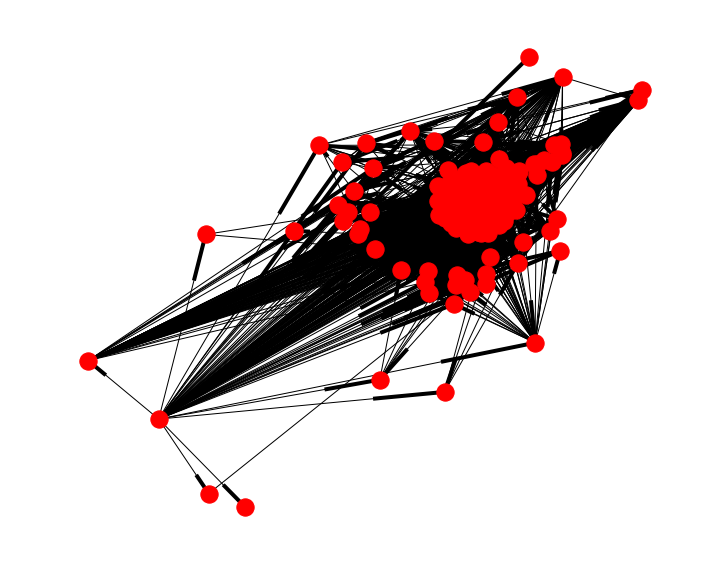

In [9]:
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(D3, with_labels=False)
plt.show()

2) Look up the PageRank algorithm in the networkx documentation. Run it and see which nodes are most important according to this measure. Create a scatterplot where you use in-degree on one axis, and pagerank on the other axis.

In [10]:
# Return the PageRank of the nodes in the graph.
"""
PageRank computes a ranking of the nodes in the graph G based on the structure 
of the incoming links. It was originally designed as an algorithm to rank web pages.

Returns: pagerank – Dictionary of nodes with PageRank as value
"""

pr = nx.pagerank(D3)
type(pr), pr['https://en.wikipedia.org/wiki/Aksu,_Antalya']

(dict, 0.021040920177817383)

If this is a dictionary than I can... (from class 9)

In [11]:

import pandas as pd
from pandas import Series
pagerank = pd.Series(pr)
type(pagerank), pagerank[0], pagerank.sort_values(ascending=False)[:10]

(pandas.core.series.Series,
 0.0038895655480074435,
 https://en.wikipedia.org/wiki/Ye%C5%9Fil%C3%B6z,_Alanya    0.040812
 https://en.wikipedia.org/wiki/%C4%B0brad%C4%B1             0.037803
 https://en.wikipedia.org/wiki/Alanya                       0.026110
 https://en.wikipedia.org/wiki/Elmal%C4%B1                  0.021720
 https://en.wikipedia.org/wiki/Antalya_Province             0.021533
 https://en.wikipedia.org/wiki/Finike                       0.021340
 https://en.wikipedia.org/wiki/Aksu,_Antalya                0.021041
 https://en.wikipedia.org/wiki/Kemer                        0.021009
 https://en.wikipedia.org/wiki/Korkuteli                    0.020913
 https://en.wikipedia.org/wiki/Manavgat                     0.020856
 dtype: float64)

In [12]:
pagerank["https://en.wikipedia.org/wiki/Mu%C4%9Fla_Province"]

0.0052888875785100133

These are beautiful seaside towns. This pagerank is drawing an ideal roadtrip plan to south mediterranean towns. You can use it

In [13]:
print(nx.info(D3))

Name: 
Type: DiGraph
Number of nodes: 155
Number of edges: 11570
Average in degree:  74.6452
Average out degree:  74.6452


In [14]:
degrees = D3.degree()
type(degrees)

dict

This is also a dictionary... <i><b>I know pandas...

In [15]:
degrees = pd.Series(degrees)
type(degrees), degrees[0], degrees.sort_values(ascending=False)[:10]

(pandas.core.series.Series,
 9,
 https://en.wikipedia.org/wiki/Antalya_Province       237
 https://en.wikipedia.org/wiki/Turkey                 235
 https://en.wikipedia.org/wiki/Mu%C4%9Fla_Province    214
 https://en.wikipedia.org/wiki/Mersin_Province        214
 https://en.wikipedia.org/wiki/Ni%C4%9Fde_Province    212
 https://en.wikipedia.org/wiki/Hatay_Province         212
 https://en.wikipedia.org/wiki/Denizli_Province       211
 https://en.wikipedia.org/wiki/Erzurum_Province       211
 https://en.wikipedia.org/wiki/Ayd%C4%B1n_Province    211
 https://en.wikipedia.org/wiki/Ankara_Province        211
 dtype: int64)

In [16]:
degrees['https://en.wikipedia.org/wiki/Aksu,_Antalya'], degrees['https://en.wikipedia.org/wiki/Mu%C4%9Fla_Province']

(142, 214)

In [17]:
df = pd.DataFrame(pagerank, columns=['pagerank'])
df['degrees'] = degrees

df.sort_values(by = 'degrees', ascending=False)

,pagerank,degrees
https://en.wikipedia.org/wiki/Antalya_Province,0.021533,237
https://en.wikipedia.org/wiki/Turkey,0.007414,235
https://en.wikipedia.org/wiki/Mu%C4%9Fla_Province,0.005289,214
https://en.wikipedia.org/wiki/Mersin_Province,0.006972,214
https://en.wikipedia.org/wiki/Ni%C4%9Fde_Province,0.005145,212
https://en.wikipedia.org/wiki/Hatay_Province,0.004856,212
https://en.wikipedia.org/wiki/Erzurum_Province,0.004555,211
https://en.wikipedia.org/wiki/Ankara_Province,0.004960,211
https://en.wikipedia.org/wiki/Denizli_Province,0.004838,211
https://en.wikipedia.org/wiki/Ayd%C4%B1n_Province,0.004816,211


In [18]:
df.describe()

,pagerank,degrees
count,155.000000,155.000000
mean,0.006452,149.290323
std,0.006798,76.061917
min,0.000978,1.000000
25%,0.004118,123.000000
50%,0.004293,205.000000
75%,0.004927,207.000000
max,0.040812,237.000000


In [19]:
df.corr() # poor correlation

,pagerank,degrees
pagerank,1.000000,0.026208
degrees,0.026208,1.000000


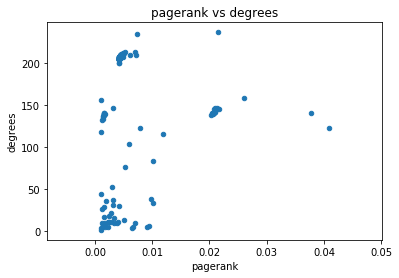

In [20]:
df.plot.scatter(x='pagerank', y='degrees', title = 'pagerank vs degrees');

3) Plot the distributions of out-degree and in-degree for your network on the same plot, on a log-log scale.

In [26]:
outs = pd.Series(D3.out_degree())
ins = pd.Series(D3.in_degree())

ins_outs = pd.DataFrame(ins, columns=['in_degrees'])
ins_outs['out_degrees'] = outs

ins_outs.head()


,in_degrees,out_degrees
https://en.wikipedia.org/wiki/%60Ala%27_ad-Din_Kay-Qubad,8,1
https://en.wikipedia.org/wiki/%C3%87anakkale_Province,99,106
https://en.wikipedia.org/wiki/%C3%87ank%C4%B1r%C4%B1_Province,99,106
https://en.wikipedia.org/wiki/%C3%87orum_Province,104,106
https://en.wikipedia.org/wiki/%C4%B0brad%C4%B1,121,19


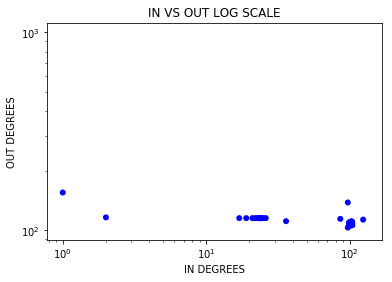

In [88]:
#ins_outs.plot.scatter(x='in_degrees', y='out_degrees', title = 'in degrees vs out degrees')

fig = plt.figure()
ax = plt.gca()

ax.scatter(ins_outs['in_degrees'] ,ins_outs['out_degrees'] , c='blue', edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("IN DEGREES")
plt.ylabel("OUT DEGREES")
plt.title("IN VS OUT LOG SCALE")

This looks like there are 4 different clusters

4) Create a BA graph of 100 nodes and with  m=3m=3  using the built in networkx function. Set an attribute size for each node proportional to the degree of the node. Visualize the graph using for nodes the size set in the attribute.

In [30]:
ba = nx.barabasi_albert_graph(100,3, seed=1)
print(nx.info(ba))

Name: barabasi_albert_graph(100,3)
Type: Graph
Number of nodes: 100
Number of edges: 291
Average degree:   5.8200


In [56]:
import numpy as np
node_degrees = pd.Series(ba.degree())

node_degrees = np.array(node_degrees)
type(node_degrees), node_degrees.size, node_degrees[0:11]

(numpy.ndarray,
 100,
 array([27, 17,  2, 20, 18, 16,  7, 26,  9,  8,  5], dtype=int64))

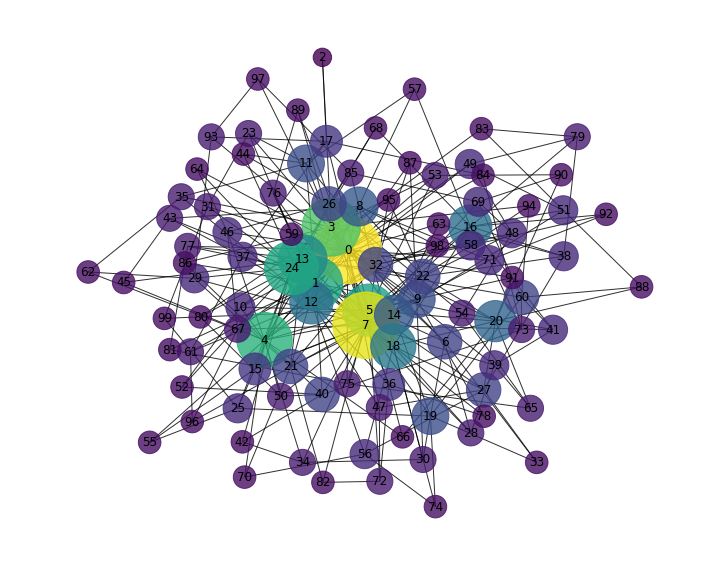

In [82]:
plt.figure(figsize=(12,10))
plt.axis('off')
nx.draw_networkx(ba, 
                 with_labels=True, 
                 node_size=node_degrees*170, 
                 node_color=node_degrees*2,
                 alpha = 0.8)
plt.show()